# Parameter estimation by optimization

## Optimal parameter
- optimal parameter : the set of parameters that brings the model (such as a Normal distribution) in the closest agreement with the data uses the mean and standard deviation computed directly from the data.
> -example: Normal Distribution
> 1. get mean, std with the actual data (empirical data)
> 2. generate the theoretical data of normal distribution with the mean and std.
> 3. plot CDF of the empirical data and theoretical data
> 4. if both are in closest agreement, the mean and std are optical parameters.
> -example: Exponential Distribution
> 1. get mean of interval time data of rare incident
> 2. generate the theoretical exponential data with the mean value
> 3. plot CDF of the empircal data and theoretical data
> 4. if both are in closest agreement, the mean is optical parameter. <br>
> **analysis**: Based on the story of the Exponential distribution, this suggests that they are a random process; when one occurrence will happen is independent of when the last occurrence was.

## Linear regression by least square
- to get fuller understanding of how the data are related to each other
- we might suspect some underlying function gives the data its shape.
- finding slope and intercept with the lowest least square

**least square** : the process of finding the parameters for which the sum of the squares of the residuals is minimal <Br>
**residual** : vertical distance between the data point (residual  = y1 - y2)

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
ins_df = pd.read_csv('../dataset/insurance.csv')
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


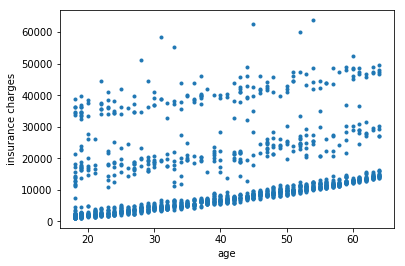

In [2]:
# plot age and charges
plt.plot(ins_df['age'], ins_df['charges'], marker = '.', linestyle = 'none')
plt.xlabel('age')
plt.ylabel('insurance charges')
plt.show()

In [3]:
# compute the correlation coefficient
np.corrcoef(ins_df['age'], ins_df['charges'])[0, 1]

0.29900819333064754

slope is  257.7226186668957 and it means a beneficiary pays  257.7226186668957 more preminum than 1 year younger person.


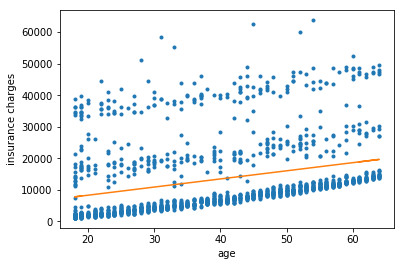

In [4]:
# get the slope and intercept of least squares with np.polyfit()
# linear function = first degree polynomial
slope, intercept = np.polyfit(ins_df['age'], ins_df['charges'], 1)
print('slope is ', slope, 'and it means a beneficiary pays ', slope, 'more preminum than 1 year younger person.')

# plot actual data
plt.plot(ins_df['age'], ins_df['charges'], marker = '.', linestyle = 'none')

# plot the linear function with slope and intercept with least square
plt.plot(ins_df['age'], (slope * ins_df['age']) + intercept)

plt.xlabel('age')
plt.ylabel('insurance charges')
plt.show()

## how is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept.
It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this excercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. 

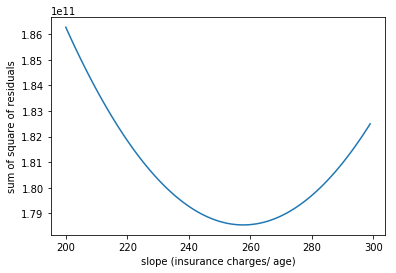

In [7]:
# specify slopes to consider: a_vals
a_vals = np.arange(200, 300, 1)

# initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# compute sum of square of residuals for each value of a_vals
# use the intercept obtained from previous excercise 
for i, a in enumerate(a_vals):
    rss[i] = np.sum((ins_df['charges'] - (a *ins_df['age']) - intercept) ** 2)

# plot the RSS
_ = plt.plot(a_vals, rss, linestyle = '-')
_ = plt.xlabel('slope (insurance charges/ age)')
_ = plt.ylabel('sum of square of residuals')
plt.show()

## the importance of EDA: Anscombe's quartet
In 1973, statistian Francis Anscombe published a paper that contained four fictitious x-y datasets. 
He uses these datasets to make an important point.
That point becomes clear if we blindly go about doing parameter estimation on these datasets. 

- four dataset's mean value of x values are same.
- four dataset's mean value of y values are same.
- linear regression: all have same line (same slope, same intercept)
- sum sq. resid are the same <br>

<img src = 'anscombe_quartet.png' width = 500></img>

# Point being?  "Look before you leap! (Graphical EDA's importance)
**Do graphical EDA first** before computing and making judgements about your data)"

- 1st graph (top left) : linear regression meaningful
- 2nd graph (bottom left) : linear regression meaningful, but look into what's causing that outlier. 
- 3rd graph (bottom right) : acquire more data for intermediate x values to make sure it is linear. 
- 4th graph (top right): not linear, choose another model

# Bootstrap confidence intervals

# Introduction to hypothesis testing

# Hypothesis test examples